# Build Sequential API ANN Model

## Objectives

A deep learning project focused on classifying bird species using MobileNetV2, with an emphasis on evaluating model performance, improving accuracy, and providing recommendations for real-world applications. The `Bird Species Dataset` is utilized to understand Machine Learning concepts with a focus on Computer Vision for bird species classification. The primary objectives include preparing the data, training the model, and evaluating its performance in recognizing various bird categories. The model's results will be analyzed to identify potential improvements and explore applications across various fields, such as education, environmental conservation, and general image recognition technology.

## Libraries

In [1]:
# System libraries for file handling and image processing
import os
from PIL import Image
import cv2
import zipfile
import shutil

# Libraries for data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Libraries for Deep Learning
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

## Data Loading

Downloading the dataset directly from Kaggle to obtain the data required for analysis and model deployment.

In [ ]:
# Download Dataset
# Source Dataset: https://www.kaggle.com/datasets/rahmasleam/bird-speciees-dataset/data
!kaggle datasets download -d rahmasleam/bird-speciees-dataset

Dataset URL: https://www.kaggle.com/datasets/rahmasleam/bird-speciees-dataset
License(s): apache-2.0




  0%|          | 0.00/15.2M [00:00<?, ?B/s]
  7%|▋         | 1.00M/15.2M [00:01<00:19, 757kB/s]
 13%|█▎        | 2.00M/15.2M [00:01<00:10, 1.29MB/s]
 20%|█▉        | 3.00M/15.2M [00:02<00:06, 1.88MB/s]
 26%|██▌       | 4.00M/15.2M [00:02<00:05, 2.26MB/s]
 33%|███▎      | 5.00M/15.2M [00:02<00:04, 2.41MB/s]
 39%|███▉      | 6.00M/15.2M [00:03<00:03, 2.76MB/s]
 46%|████▌     | 7.00M/15.2M [00:03<00:02, 3.00MB/s]
 52%|█████▏    | 8.00M/15.2M [00:03<00:02, 3.21MB/s]
 59%|█████▉    | 9.00M/15.2M [00:03<00:01, 3.50MB/s]
 66%|██████▌   | 10.0M/15.2M [00:04<00:01, 3.69MB/s]
 72%|███████▏  | 11.0M/15.2M [00:04<00:01, 3.51MB/s]
 79%|███████▊  | 12.0M/15.2M [00:04<00:00, 3.49MB/s]
 85%|████████▌ | 13.0M/15.2M [00:05<00:00, 2.80MB/s]
 92%|█████████▏| 14.0M/15.2M [00:05<00:00, 2.93MB/s]
 98%|█████████▊| 15.0M/15.2M [00:05<00:00, 3.13MB/s]
100%|██████████| 15.2M/15.2M [00:05<00:00, 2.69MB/s]


## Data Preprocessing

Extracting the ZIP file containing the bird dataset into a folder.

In [2]:
# Path to the ZIP file
zip_path = 'bird-speciees-dataset.zip'

# Destination folder for extracted files
dest_path = 'bird-speciees-main'

# Extract files from the ZIP archive
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dest_path)
print(f'Files extracted to "{dest_path}"')

Files extracted to "bird-speciees-main"


Renaming the bird dataset folder from `Bird Speciees Dataset` to `bird_speciees_dataset` for consistency and easier access.

In [3]:
# Define old and new folder names
old_folder_name = 'bird-speciees-main\\Bird Speciees Dataset'
new_folder_name = 'bird-speciees-main\\bird_speciees_dataset'

# Rename the folder if it exists
if os.path.exists(old_folder_name):
    os.rename(old_folder_name, new_folder_name)
    print(f"Folder has been renamed from '{old_folder_name}' to '{new_folder_name}'.")
else:
    print(f"Folder '{old_folder_name}' does not exist.")

Folder has been renamed from 'bird-speciees-main\Bird Speciees Dataset' to 'bird-speciees-main\bird_speciees_dataset'.


Deleting the `EMPEROR PENGUIN` bird dataset folder (if it exists) to meet the requirement of a maximum of 5 classes/labels for more in-depth analysis.

In [4]:
# Path to the folder to be deleted
folder_path = 'bird-speciees-main\\bird_speciees_dataset\\EMPEROR PENGUIN'

# Delete the folder and its contents if it exists
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' has been deleted successfully.")
else:
    print(f"Folder '{folder_path}' does not exist.")

Folder 'bird-speciees-main\bird_speciees_dataset\EMPEROR PENGUIN' has been deleted successfully.


Renaming bird dataset folders iteratively to ensure consistency in naming and easier access.

In [5]:
# List of tuples containing (old_folder_name, new_folder_name)
folders_to_rename = [
    ('bird-speciees-main\\bird_speciees_dataset\\AMERICAN GOLDFINCH', 'bird-speciees-main\\bird_speciees_dataset\\american_goldfinch'),
    ('bird-speciees-main\\bird_speciees_dataset\\BARN OWL', 'bird-speciees-main\\bird_speciees_dataset\\barn_owl'),
    ('bird-speciees-main\\bird_speciees_dataset\\CARMINE BEE-EATER', 'bird-speciees-main\\bird_speciees_dataset\\carmine_bee_eater'),
    ('bird-speciees-main\\bird_speciees_dataset\\DOWNY WOODPECKER', 'bird-speciees-main\\bird_speciees_dataset\\downy_woodpecker'),
    ('bird-speciees-main\\bird_speciees_dataset\\FLAMINGO', 'bird-speciees-main\\bird_speciees_dataset\\flamingo')
]

# Iterate through each tuple to rename folders
for old_name, new_name in folders_to_rename:
    if os.path.exists(old_name):
        os.rename(old_name, new_name)  # Rename folder
        print(f"Folder '{old_name}' has been renamed to '{new_name}'.")
    else:
        print(f"Folder '{old_name}' does not exist.")

Folder 'bird-speciees-main\bird_speciees_dataset\AMERICAN GOLDFINCH' has been renamed to 'bird-speciees-main\bird_speciees_dataset\american_goldfinch'.
Folder 'bird-speciees-main\bird_speciees_dataset\BARN OWL' has been renamed to 'bird-speciees-main\bird_speciees_dataset\barn_owl'.
Folder 'bird-speciees-main\bird_speciees_dataset\CARMINE BEE-EATER' has been renamed to 'bird-speciees-main\bird_speciees_dataset\carmine_bee_eater'.
Folder 'bird-speciees-main\bird_speciees_dataset\DOWNY WOODPECKER' has been renamed to 'bird-speciees-main\bird_speciees_dataset\downy_woodpecker'.
Folder 'bird-speciees-main\bird_speciees_dataset\FLAMINGO' has been renamed to 'bird-speciees-main\bird_speciees_dataset\flamingo'.


Adding the folder name as a prefix to each file name within the dataset folder to improve file identification more clearly.

In [6]:
# List of directories containing the target folders
base_directories = [
    'bird-speciees-main\\bird_speciees_dataset\\american_goldfinch',
    'bird-speciees-main\\bird_speciees_dataset\\barn_owl',
    'bird-speciees-main\\bird_speciees_dataset\\carmine_bee_eater',
    'bird-speciees-main\\bird_speciees_dataset\\downy_woodpecker',
    'bird-speciees-main\\bird_speciees_dataset\\flamingo'
]

# Loop through each folder in the directory list
for folder_path in base_directories:
    if os.path.isdir(folder_path):  # Check if the path is a folder
        folder_name = os.path.basename(folder_path)  # Extract folder name

        # Loop through all files in the folder
        for filename in os.listdir(folder_path):
            old_file_path = os.path.join(folder_path, filename)  # Current file path
            # Add folder name as a prefix to the original file name
            new_filename = f"{folder_name}_{filename}"
            new_file_path = os.path.join(folder_path, new_filename)

            # Rename the file
            os.rename(old_file_path, new_file_path)

## Store in DataFrame

Reading images from the bird dataset folder, extracting labels based on folder names, and storing file paths, labels, and image data into a DataFrame for analysis and model deployment preparation.

In [2]:
# Path to the main directory containing dataset folders
data_dir = 'bird-speciees-main\\bird_speciees_dataset'

# Initialize lists to store file paths, images, and labels
filepaths, image_list, label_list = [], [], []

# Get all folder names in the dataset directory
folders = os.listdir(data_dir)

# Loop through each folder to collect file paths and labels
for fold in folders:
    foldpath = os.path.join(data_dir, fold)  # Path to the current folder
    flist = os.listdir(foldpath)  # List of files in the current folder
    for f in flist:
        fpath = os.path.join(foldpath, f)  # Full file path
        filepaths.append(fpath)  # Add file path to the list
        label_list.append(fold)  # Add folder name as the label

# Read and process images
for file in filepaths:
    image = cv2.imread(file)  # Read image
    image = img_to_array(image)  # Convert to an array
    image_list.append(image)  # Add image to the list

# Combine file paths and labels into a DataFrame
Fseries = pd.Series(filepaths, name='filepaths')  # Create a Series for file paths
Lseries = pd.Series(label_list, name='labels')  # Create a Series for labels
df = pd.concat([Fseries, Lseries], axis=1)  # Combine into a DataFrame

In [3]:
df

filepaths              labels
0    bird-speciees-main\bird_speciees_dataset\ameri...  american_goldfinch
1    bird-speciees-main\bird_speciees_dataset\ameri...  american_goldfinch
2    bird-speciees-main\bird_speciees_dataset\ameri...  american_goldfinch
3    bird-speciees-main\bird_speciees_dataset\ameri...  american_goldfinch
4    bird-speciees-main\bird_speciees_dataset\ameri...  american_goldfinch
..                                                 ...                 ...
667  bird-speciees-main\bird_speciees_dataset\flami...            flamingo
668  bird-speciees-main\bird_speciees_dataset\flami...            flamingo
669  bird-speciees-main\bird_speciees_dataset\flami...            flamingo
670  bird-speciees-main\bird_speciees_dataset\flami...            flamingo
671  bird-speciees-main\bird_speciees_dataset\flami...            flamingo

[672 rows x 2 columns]

## Exploratory Data Analysis (EDA)

### Number of Classes

Creating bar chart and pie chart visualizations to display the count and proportion of images per bird category.

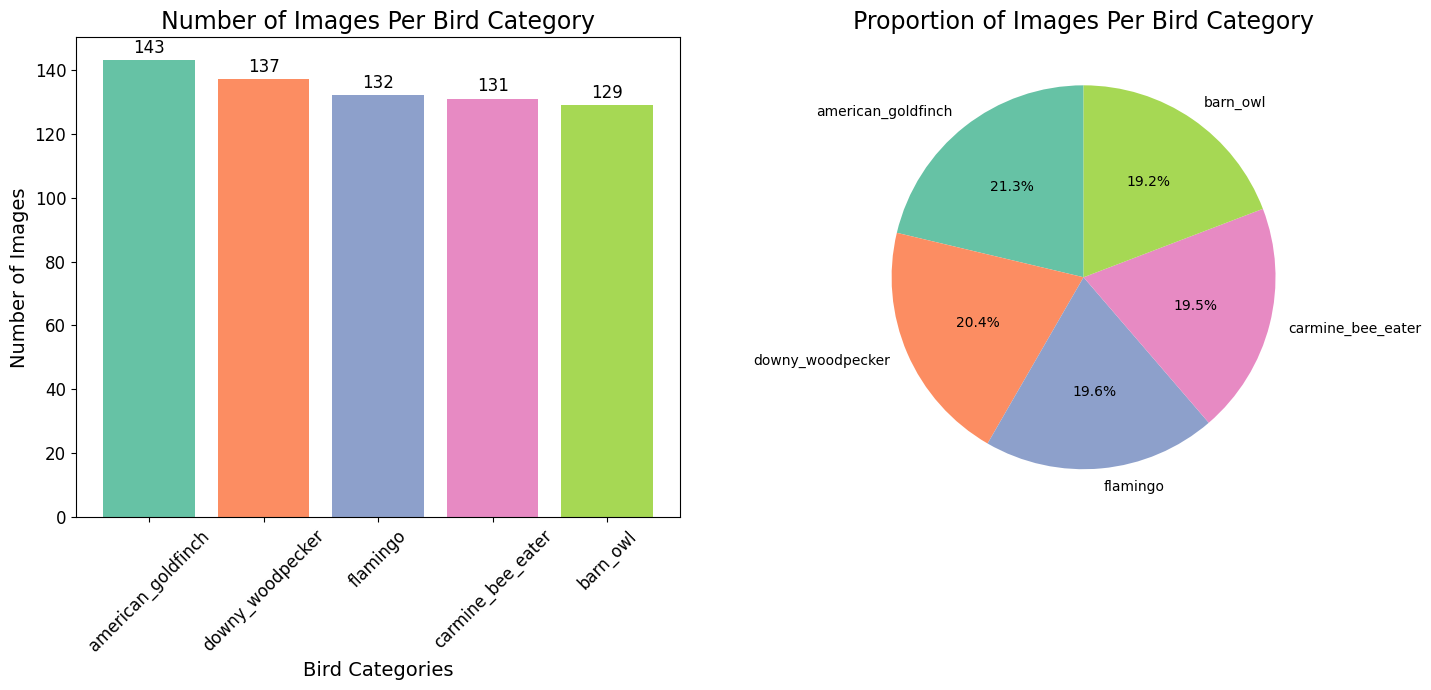

In [4]:
# Count the number of images per category from the DataFrame
category_counts = df['labels'].value_counts()

# Create a figure with two subplots (Bar Chart and Pie Chart)
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
palette = sns.color_palette("Set2", len(category_counts))

# Bar Chart: Number of Images Per Bird Category
axes[0].bar(category_counts.index, category_counts.values, color=palette)
axes[0].set_title("Number of Images Per Bird Category", fontsize=17)
axes[0].set_xlabel("Bird Categories", fontsize=14)
axes[0].set_ylabel("Number of Images", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Add value labels above each bar
for i, val in enumerate(category_counts.values):
    axes[0].text(i, val + 1, str(val), ha='center', va='bottom', fontsize=12)

# Pie Chart: Proportion of Images Per Bird Category
wedges, texts, autotexts = axes[1].pie(
    category_counts.values,
    labels=category_counts.index,
    autopct='%1.1f%%',  # Display percentage
    colors=palette,
    startangle=90
)
axes[1].set_title("Proportion of Images Per Bird Category", fontsize=17)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

From the visualizations above, the following insights can be derived:
- The `American Goldfinch` category has the highest number of images, totaling 143.
- The `Barn Owl` category has the fewest images, with 129.
- The difference between the category with the most and the least images is not significant (a gap of 14 images).
- All categories have relatively balanced proportions of images, indicating that the dataset distribution is fairly uniform, making `accuracy` a suitable metric.
- With an average of approximately 130-140 images per category, the number of images is sufficient for training a basic machine learning model.

### Visualize Bird Species

Displaying a random image from each bird species category.

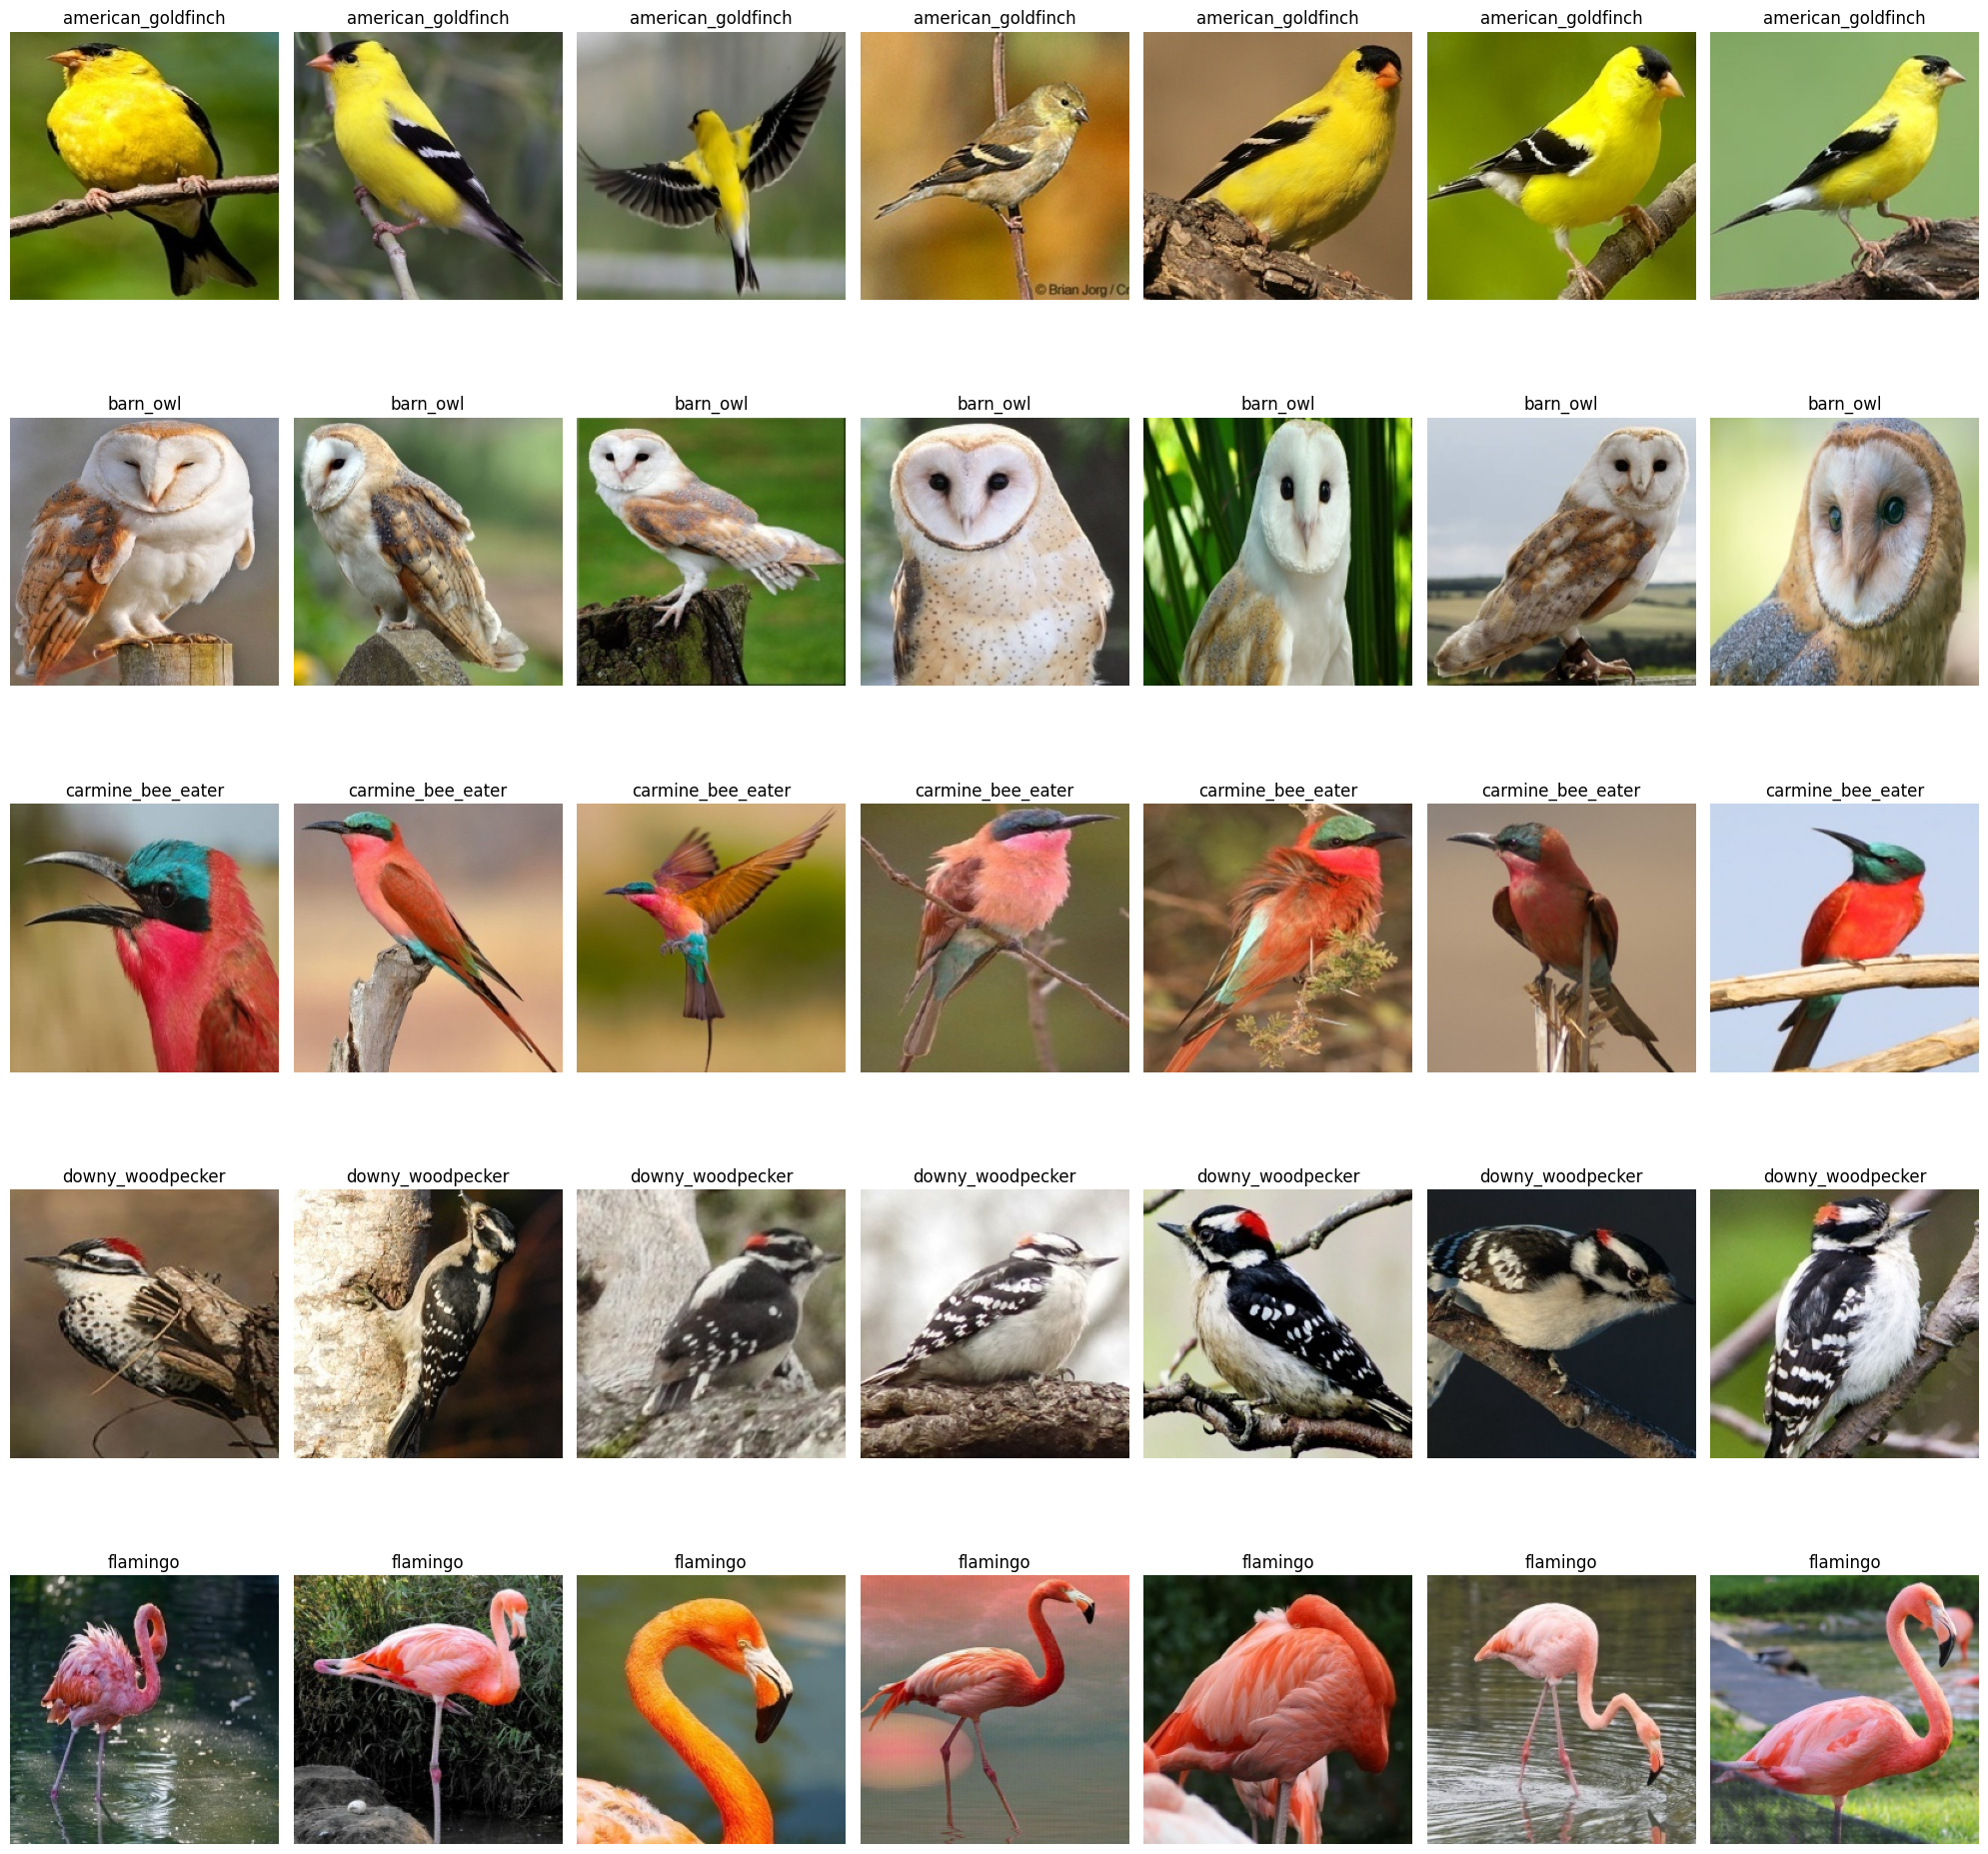

In [5]:
# Number of images to display per bird species
num_images = 7

# Get unique bird species labels from the DataFrame
bird_species = df['labels'].unique()

# Set the figure size for visualization
plt.figure(figsize=(20, 20))

# Loop through each bird species
for idx, bird in enumerate(bird_species):
    # Randomly sample images for the current bird species
    bird_df = df[df['labels'] == bird].sample(num_images)
    
    # Loop to display each image for the bird species
    for i, file in enumerate(bird_df['filepaths'].values):
        plt.subplot(len(bird_species), num_images, idx * num_images + i + 1)  # Define subplot position
        img = Image.open(file)
        plt.imshow(img)
        plt.axis('off')
        plt.title(bird)
    
# Adjust layout for better spacing
plt.tight_layout()

# Show the visualizations
plt.show()

Here are some insights from the grid visualization of bird images displaying various species:
- The displayed species include `American Goldfinch`, `Barn Owl`, `Carmine Bee-eater`, `Downy Woodpecker`, and `Flamingo`.
- Visual characteristics of each species:
    1. **American Goldfinch**: Bright yellow plumage with black patterns on the wings and a small beak.
    2. **Barn Owl**: Heart-shaped face with pale white color, cream-colored feathers with brown spots, and large eyes adapted for night vision.
    3. **Carmine Bee-eater**: Red plumage with a blue gradient on the head, a sharp and curved beak.
    4. **Downy Woodpecker**: Black and white feathers with spotted patterns, short beak.
    5. **Flamingo**: Bright pink feathers with long slender legs and a curved beak.
- Each species exhibits consistent characteristics in color, body shape, and beak structure, even across different images.
- This dataset demonstrates consistent species characteristics, which will help a machine learning model classify images effectively based on features like color, patterns, or beak and body shapes.

## Feature Engineering

### Spliting the Data

Splitting the dataset into `train`, `validation`, and `test` subsets with stratification based on `labels` to maintain balanced class distribution in each subset. The subsets consist of 75% data for training, 12.5% for validation, and 12.5% for testing.

In [6]:
# Split dataset into training (75%) and remaining (25%) sets
strat = df['labels']
train_df, dummy_df = train_test_split(df, test_size=.25, shuffle=True, stratify=strat, random_state=7)

# Split the remaining data into validation (50%) and test (50%) sets
strat = dummy_df['labels']
valid_df, test_df = train_test_split(dummy_df, test_size=.5, shuffle=True, stratify=strat, random_state=7)

In [7]:
print(f"Number of Training dataset: {len(train_df)}\nNumber of Validation dataset: {len(valid_df)}\nNumber of Testing dataset: {len(test_df)}")

Number of Training dataset: 504
Number of Validation dataset: 84
Number of Testing dataset: 84


**INSIGHT**
- The dataset consists of a total of 672 samples, divided into three subsets:
    1. `train_df`: 504 samples (75% of the total dataset).
    2. `valid_df`: 84 samples (12.5% of the total dataset).
    3. `test_df`: 84 samples (12.5% of the total dataset).
- The **training set** is used to train the model to recognize patterns in the data.
- The **validation set** is used to evaluate the model's performance during training and assist in hyperparameter tuning.
- The **testing set** is used to evaluate the model's final performance on unseen data.

### Augmentation

In [8]:
image_list[0].shape

(224, 224, 3)

The dimension check reveals that the images have a size of 224 pixels x 224 pixels with 3 color channels (RGB format).

Applying data augmentation to the training set to increase data variability using rotation, zoom, and horizontal flipping. The validation and test sets are only standardized through pixel normalization. All data is loaded into an `ImageDataGenerator` with a batch size of `64` and an image resolution of `224x224x3`.

Data augmentation is specifically applied only to the training set since validation and test sets should reflect the original data for accurate evaluation. Augmentation serves the following purposes:
- **Enhancing Generalization**: By introducing additional variations such as rotation, zoom, and flipping, the model learns to recognize patterns from diverse perspectives, making it more robust when encountering new or different data.
- **Reducing Overfitting**: Prevents the model from relying too heavily on specific patterns in the training data by diversifying the data, ensuring the model does not merely "memorize" the original images.
- **Maximizing Small Datasets: Produces more variability, which is crucial when working with limited data, as in this dataset.**

In [9]:
# Image dimensions and normalization settings
batch_size = 64
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Augmentation for training data
tr_gen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values to [0, 1]
    rotation_range=30,        # Random rotation
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flips
)

# Only rescaling for validation and test data
ts_gen = ImageDataGenerator(rescale=1./255)

# Data generator for training set
train_gen = tr_gen.flow_from_dataframe(
    train_df, x_col='filepaths', y_col='labels',
    target_size=img_size, class_mode='sparse',
    color_mode='rgb', shuffle=True, batch_size=batch_size
)

# Data generator for validation set
valid_gen = ts_gen.flow_from_dataframe(
    valid_df, x_col='filepaths', y_col='labels',
    target_size=img_size, class_mode='sparse',
    color_mode='rgb', shuffle=True, batch_size=batch_size
)

# Data generator for test set
test_gen = ts_gen.flow_from_dataframe(
    test_df, x_col='filepaths', y_col='labels',
    target_size=img_size, class_mode='sparse',
    color_mode='rgb', shuffle=False, batch_size=batch_size
)

Found 504 validated image filenames belonging to 5 classes.
Found 84 validated image filenames belonging to 5 classes.
Found 84 validated image filenames belonging to 5 classes.


In [10]:
# Display the mapping of class labels to their corresponding indices
train_gen.class_indices

{'american_goldfinch': 0,
 'barn_owl': 1,
 'carmine_bee_eater': 2,
 'downy_woodpecker': 3,
 'flamingo': 4}

**INSIGHT**
- The output shows that the dataset consists of 5 classes, each representing a specific bird species, where each `label` (bird species name) has been mapped to a numeric index.
- These numeric indices are used by the machine learning model to process the labels in a compatible format, with the model predicting the probability of each class based on these indices.
-  This label mapping is essential for multi-class classification, ensuring the model consistently interprets the labels during training and evaluation.

## Base Model

### Model Definition

Define and build a model using the Keras Sequential API with the following architecture:
- Set the `seed` to ensure reproducible (consistent) results every time the code is executed.
- 3 `Conv2D` layers with `ReLU` activation and pooling.
- A `Flatten` layer to flatten the output.
- A `Dropout` layer to prevent overfitting.
- A `Dense` layer with 512 neurons for complex feature extraction.
- An output layer with 5 neurons and `softmax` activation for multi-class classification.

In [11]:
# Set seed for reproducibility
seed = 7
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Initialize the Sequential model
model = Sequential()

# Layer 1: Convolutional layer with 32 filters and Max Pooling
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', strides=(1, 1), input_shape=(img_shape)))
model.add(MaxPooling2D(2, 2))

# Layer 2: Convolutional layer with 64 filters and Max Pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Layer 3: Convolutional layer with 128 filters and Max Pooling
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten: Converts 3D tensors to 1D vectors for fully connected layers
model.add(Flatten())

# Dropout: Regularization to reduce overfitting
model.add(Dropout(0.75))

# Fully Connected Layer with 512 neurons and ReLU activation
model.add(Dense(512, activation='relu'))

# Output Layer: Softmax activation for multi-class classification (5 classes)
model.add(Dense(5, activation='softmax'))

Compile the model with the following configurations:
- `loss='sparse_categorical_crossentropy'` for multi-class classification with integer labels.
- `optimizer='adam'` for efficient weight updates.
- `metrics=['accuracy']` to evaluate the model's performance.

In [12]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 55, 55, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 27, 27, 128)       

This model is designed for classifying 5 classes, with an output layer using softmax to produce probabilities for each class.

**Model Architecture**
: The model comprises several key layers
- 3 `Conv2D` layers for feature extraction with 3x3 kernels and increasing filter sizes (32, 64, 128).
- 3 `MaxPooling2D` layers to reduce spatial dimensions.
- A `Flatten` layer to convert the output into a 1D vector.
- A `Dropout` layer to prevent overfitting.
- 2 `Dense` layers, one for feature extraction (512 neurons) and another for output (5 neurons, corresponding to the number of classes).

**Parameters**
- The final Dense layer has the largest number of parameters (47,776,256) due to the connection between the flattened features and the 512 neurons.
- The total number of parameters is 47,872,069 (approximately 182.62 MB), indicating a significant capacity to learn complex patterns but also requiring substantial data and training time.
- There are no non-trainable parameters in the model.

This architecture balances complexity and performance, making it suitable for multi-class classification tasks with rich datasets.

### Model Training

After completing the model definition, train the model using data from `train_gen` for 35 epochs, with `valid_gen` for validation, and process the data in batches according to the predefined size. The training results are stored in the `history` variable for performance analysis.

In [13]:
# Train model
history = model.fit(train_gen, epochs=35, validation_data=valid_gen, batch_size=batch_size)

Epoch 1/35


8/8 [==============================] - 14s 1s/step - loss: 3.0568 - accuracy: 0.2163 - val_loss: 1.5682 - val_accuracy: 0.2262
Epoch 2/35
8/8 [==============================] - 12s 1s/step - loss: 1.4978 - accuracy: 0.3234 - val_loss: 1.2810 - val_accuracy: 0.5119
Epoch 3/35
8/8 [==============================] - 12s 1s/step - loss: 1.1372 - accuracy: 0.5456 - val_loss: 0.7785 - val_accuracy: 0.7143
Epoch 4/35
8/8 [==============================] - 12s 2s/step - loss: 0.8387 - accuracy: 0.6667 - val_loss: 0.7453 - val_accuracy: 0.6905
Epoch 5/35
8/8 [==============================] - 13s 2s/step - loss: 0.7535 - accuracy: 0.7321 - val_loss: 0.6133 - val_accuracy: 0.7738
Epoch 6/35
8/8 [==============================] - 15s 2s/step - loss: 0.4812 - accuracy: 0.8175 - val_loss: 0.4883 - val_accuracy: 0.8452
Epoch 7/35
8/8 [==============================] - 17s 2s/step - loss: 0.3995 - accuracy: 0.8571 - val_loss: 0.2802 - val_accuracy: 0.8929
Epoch 8/35
8/8 [================

**INSIGHT**
- The model demonstrated strong performance during training, achieving a training accuracy of **97.22%** and maintaining stable validation accuracy at **90.48%** by the end of epoch 35.
- Early in the training process, the model showed a significant improvement, with validation accuracy increasing from **21.63%** in the first epoch to **90.67%** by the 10th epoch. A consistent reduction in training and validation loss indicates that the model effectively learned from the data, although minor fluctuations in validation loss during the final epochs suggest slight overfitting.
- The gap between higher training accuracy and lower validation accuracy indicates potential for optimization. Techniques such as **Transfer Learning** or `Early Stopping` can help prevent further overfitting. Additionally, using a scheduler like `ReduceLROnPlateau` to adjust the learning rate when validation performance plateaus may improve convergence and overall performance.

Create a visualization of the model architecture using `Keras`, displaying the shape of each layer to simplify the understanding of the model's structure.

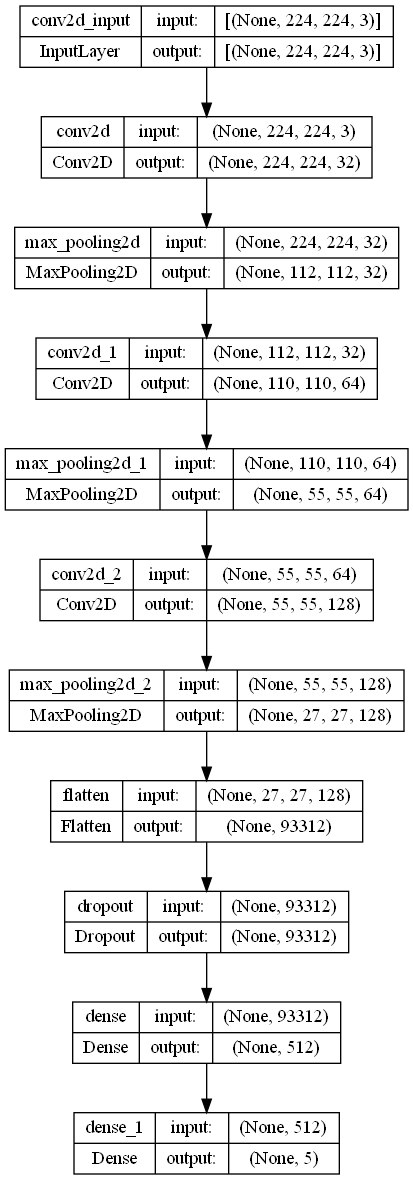

In [14]:
# Visualize the model architecture with layer shapes displayed
tf.keras.utils.plot_model(model, show_shapes=True)

**INSIGHT**
1. **Architecture Overview**: The model is based on a Convolutional Neural Network (CNN) architecture, consisting of Convolutional, MaxPooling, Flatten, and Dense layers. This architecture is well-suited for image classification due to its ability to extract spatial features from images.
2. **Layer Structure**:
    - **Input Layer**: The input size indicates that the model accepts RGB images with dimensions of 224x224 pixels.
    - **Convolutional Layers**: The model has three convolutional layers, each using a (3x3) kernel. The number of filters increases progressively (32, 64, and 128), enabling the model to capture increasingly complex features at each level.
    - **Pooling Layers**: Each convolutional layer is followed by a MaxPooling layer, which reduces the spatial dimensions of the output. This helps lower computational complexity and prevents overfitting by retaining essential features.
    - **Flatten Layer**: This layer flattens the output from the previous layer (from 27x27x128 to 93312) to prepare it for connection to the Dense layers.
    - **Dropout Layer**: Dropout is applied to prevent overfitting by randomly deactivating a subset of nodes during training.
    - **Dense Layers**: Dense 1 with 512 units and ReLU activation acts as a hidden layer for feature extraction. Dense Output with 5 units (matching the number of target categories) uses softmax activation for multi-class classification.
3. **Dimensionality Reduction**: Each layer progressively reduces the output dimensions through the combination of Convolutional and MaxPooling layers, simplifying features while retaining important information.
4. **Output Layer**: The output layer has 5 nodes, indicating that the model is designed to classify images into 5 distinct categories.
5. **Overfitting Prevention**: The use of pooling and Dropout layers demonstrates that the model is designed to prevent overfitting while improving computational efficiency.
6. **Overall Design**: The architecture is simple yet effective for multi-class image classification tasks and is well-suited for datasets with moderate image sizes and a limited number of categories. This balance of complexity and efficiency makes it ideal for practical applications on such datasets.

### Model Evaluation

After completing model training, the next step is to create plots to evaluate the model's performance by:
- Displaying the loss curve for the training and validation sets to examine training stability and detect overfitting.
- Displaying the accuracy curve for the training and validation sets to evaluate the model's performance improvement over epochs.

The results provide insights into how the model learns and how well it generalizes to the validation data.

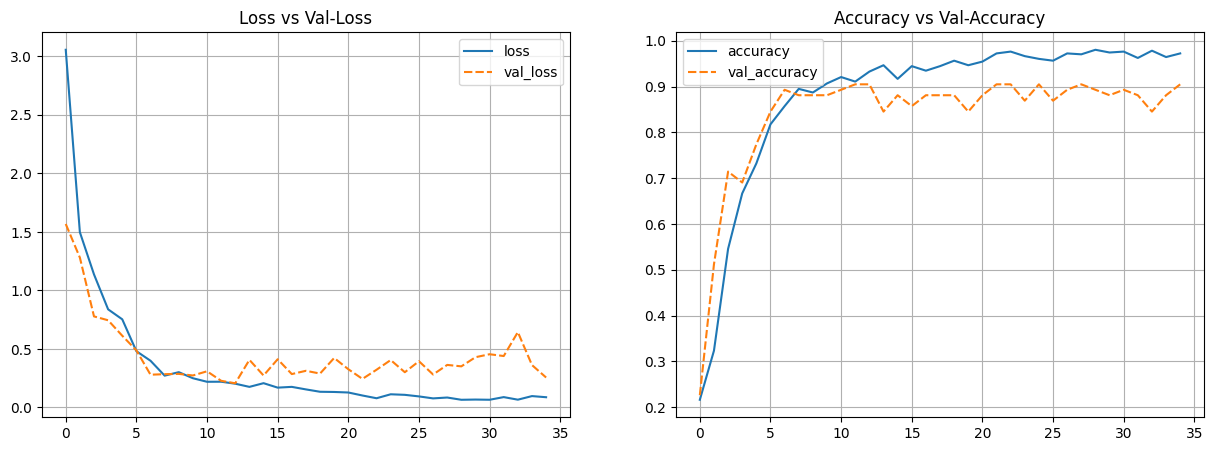

In [15]:
# Convert training history to a DataFrame
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])  # Plot training and validation loss
plt.grid()
plt.title('Loss vs Val-Loss')

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])  # Plot training and validation accuracy
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.show()

From the `Loss vs Val-Loss` and `Accuracy vs Val-Accuracy` graphs, the following insights can be drawn:
1. `Loss vs Val-Loss`
    - The loss on the training set consistently decreases as epochs progress, indicating that the model is learning patterns from the training data effectively.
    - The loss approaches zero, demonstrating the model's ability to minimize errors on the training set.
    - Validation loss also decreases during the early stages of training, reflecting the model's capability to generalize to the validation data.
    - However, after around epoch 15, the validation loss begins to fluctuate with slight increases or inconsistencies. These fluctuations may signal the onset of overfitting, although the gap between training loss and validation loss remains relatively small.

2. `Accuracy vs Val-Accuracy`
    - Training accuracy increases rapidly, reaching nearly 1 (almost 100%) by approximately epoch 10, indicating excellent learning performance on the training data.
    - Validation accuracy rises sharply up to around epoch 10 and then stabilizes with minor fluctuations. These fluctuations remain within an acceptable range and do not indicate a significant drop, suggesting the model maintains generalization performance.
    - The accuracy and validation accuracy curves are closely aligned throughout the training process, indicating a good fit, as there is no significant discrepancy between performance on the training and validation datasets.

3. **General Performance**
    - The model exhibits strong performance with a small gap between loss and validation loss, as well as between accuracy and validation accuracy.
    - Minor signs of overfitting appear after epoch 15, as evidenced by greater fluctuations in validation loss compared to training loss, but these are not severe since validation accuracy remains stable.
    - Overall, the model demonstrates excellent performance with solid generalization capabilities, making it suitable for deployment on new data with expected similar performance.

To evaluate the model's performance on the test set, the following steps can be implemented:
- **Predict Class Probabilities**: Use the model to predict probabilities for each class in the test set.
- **Determine Predicted Classes**: Assign the class with the highest probability as the predicted class.
- **Generate Accuracy Metrics**: Use the `classification_report` to display precision, recall, F1-score, and overall accuracy.

In [16]:
# Evaluate model performance on the test set
# Predict class probabilities for the test set
y_pred_prob = model.predict_generator(test_gen)

# Extract the class with the highest probability for each prediction
y_pred_class = np.argmax(y_pred_prob, axis=-1)

# Display the test set accuracy
print('Test - Accuracy Score: ', classification_report(test_gen.classes, y_pred_class, output_dict=True)['accuracy'])

Test - Accuracy Score:  0.9166666666666666


**INSIGHT**
- The overall accuracy is approximately **91%**, indicating that the model performs exceptionally well in classifying bird images in the test set.
- The model demonstrates good generalization capabilities as the test set accuracy closely matches the validation set accuracy, suggesting a **good fit** model.

## Improvement Model

### Model Definition

To improve the model, a transfer learning approach using MobileNetV2 is applied. The benefits of using this model include:
- **Efficiency and Lightweight**: Designed for devices with limited resources due to fewer parameters, reducing memory requirements and accelerating training.
- **Transfer Learning**:By leveraging pre-trained weights from the ImageNet dataset, the model can immediately utilize foundational features like edge, color, and shape recognition without training from scratch. This saves time and resources, particularly for small datasets.
- **High Performance**:Despite being lightweight, it delivers excellent performance in classification, object detection, and segmentation tasks. Its architecture employs depthwise separable convolutions, which enhance computational efficiency without compromising accuracy.
- **Good Generalization**:Features learned from ImageNet enable the model to recognize patterns that are applicable across diverse datasets, including the bird image dataset in this project.
- **Flexibility**:Easily customizable by adding new layers to accommodate the number of classes and unique characteristics of different datasets.
- **Reduced Overfitting**:Since most parameters come from the pre-trained model, the risk of overfitting on small datasets is minimized.

In [17]:
# Use MobileNetV2 as the base model for transfer learning
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_shape),       # Define the input shape
    include_top=False,             # Exclude the top layers of the pre-trained model
    weights='imagenet'             # Use pre-trained weights from ImageNet
)
base_model.trainable = False       # Freeze the base model to prevent re-training

# Create a new model using the base model
improve_model = models.Sequential([
    base_model,                    # Base model for feature extraction
    GlobalAveragePooling2D(),      # Reduce dimensions while preserving features
    Dense(5, activation='softmax') # Output layer for multi-class classification
])

Compile the model with the following configurations:
- `optimizer='adam'` for efficient weight updates.
- `loss='sparse_categorical_crossentropy'` for multi-class classification with integer labels.
- `metrics=['accuracy']` to evaluate the model's performance.

In [18]:
# Compile model
improve_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
improve_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


MobileNetV2 leverages pre-trained features from ImageNet, utilizing the power of transfer learning, so only the final layers require training. The model is small and efficient, making it ideal for classification tasks with limited resources. It is designed for multi-class classification (5 classes) with a simple structure built on top of the base model, suitable for small datasets as it trains only a small number of parameters, thereby reducing the risk of overfitting.

**Model Structure**
- Base Model (`MobileNetV2`):
    - The output shape `(None, 7, 7, 1280)` indicates that the base model generates features with spatial dimensions of 7x7 and 1280 channels.
    - The total parameters of 2,257,984 are all non-trainable since the base model is frozen, accelerating training and minimizing the risk of overfitting.
- Global Average Pooling:
    - This layer flattens the features from the base model into a vector of length 1280, reducing dimensions without losing key information.
    - This layer has no parameters as it only performs a pooling operation.
- Dense Layer:
    - This layer has 5 neurons (matching the number of classes) with a softmax activation function to generate probabilities for each class.
    - It includes 6,405 trainable parameters, representing the weights and biases for the 5 classes.

**Model Parameters**: The total parameters of **2,264,389** (approximately 8.64 MB) indicate that the model is lightweight, making it efficient for both training and deployment.

To further improve the model, set up the following callbacks to enhance the training process:
- `EarlyStopping`: Stops training early if there is no improvement in validation loss after 5 consecutive epochs.
- `ReduceLROnPlateau`: Automatically reduces the learning rate when validation loss fails to improve after 3 consecutive epochs.

In [19]:
# Setup callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

### Model Training

Proceed with model training using the training and validation datasets, with training conducted for a maximum of **35** epochs and the specified batch size. However, the training may stop early if the `EarlyStopping` conditions are met.

In [20]:
# Train model improvement
history_improve_model = improve_model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=35,
    callbacks=[early_stopping, reduce_lr],
    batch_size=batch_size
)

Epoch 1/35
8/8 [==============================] - 16s 1s/step - loss: 1.3718 - accuracy: 0.4266 - val_loss: 0.7471 - val_accuracy: 0.8452 - lr: 0.0010
Epoch 2/35
8/8 [==============================] - 9s 1s/step - loss: 0.5021 - accuracy: 0.9266 - val_loss: 0.2545 - val_accuracy: 0.9762 - lr: 0.0010
Epoch 3/35
8/8 [==============================] - 14s 2s/step - loss: 0.2122 - accuracy: 0.9802 - val_loss: 0.1184 - val_accuracy: 0.9881 - lr: 0.0010
Epoch 4/35
8/8 [==============================] - 13s 2s/step - loss: 0.1153 - accuracy: 0.9881 - val_loss: 0.0726 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/35
8/8 [==============================] - 13s 2s/step - loss: 0.0762 - accuracy: 0.9901 - val_loss: 0.0560 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/35
8/8 [==============================] - 13s 2s/step - loss: 0.0577 - accuracy: 0.9940 - val_loss: 0.0480 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/35
8/8 [==============================] - 13s 2s/step - loss: 0.0516 - accuracy: 0.9980

From the training results, the model demonstrates excellent performance, achieving **100% training accuracy** starting from epoch 12 and maintaining consistent **100% validation accuracy** from epoch 4 until the end of training. This indicates that the model effectively learns patterns from the training data and exhibits outstanding generalization capability on the validation data. Additionally, the training loss significantly decreases to **0.0080** by the final epoch, while the validation loss continues to decrease to **0.0086**, with no signs of overfitting. The stability of metrics after the initial epochs suggests that the model efficiently utilizes the learning process. The learning rate remains constant at **0.001** throughout the training, indicating that the learning speed is sufficiently effective without requiring further adjustments.

Next, create a visualization of the improved model architecture using `Keras`, displaying the shape of each layer to facilitate a better understanding of the model structure.

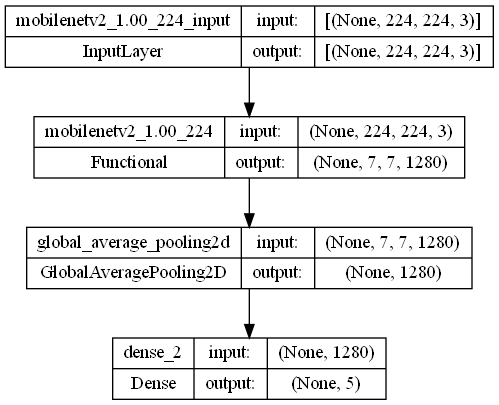

In [21]:
# Visualize the model architecture with layer shapes displayed
tf.keras.utils.plot_model(improve_model, show_shapes=True)

The displayed model architecture is a transfer learning implementation based on `MobileNetV2`, designed for classifying 5 bird species. The model accepts input images with dimensions of 224x224 pixels and 3 channels (RGB). The core `MobileNetV2` layer acts as a feature extractor, leveraging pre-trained weights from the `ImageNet` dataset. The output of this layer has dimensions (7, 7, 1280), representing essential features extracted from the input images.

Next, the `GlobalAveragePooling2D` layer reduces these dimensions to (1280) by performing global average pooling, simplifying the feature representation without losing critical information. The final layer is a `Dense` layer with an output of (5), corresponding to the number of classes, where the `Softmax` activation function is used to generate prediction probabilities for each class.

The use of `MobileNetV2` in this architecture allows the model to take advantage of pre-trained features, improving efficiency and accuracy even with a small dataset. Additionally, dimensionality reduction through `GlobalAveragePooling2D` minimizes the risk of overfitting and enhances computational efficiency.

### Model Evaluation

After completing model training, the next step is to create plots to evaluate the performance of the improved model by:
- Displaying the loss curve for the training and validation sets to assess training stability and detect potential overfitting.
- Displaying the accuracy curve for the training and validation sets to evaluate the model's performance improvement over epochs.

The results provide insights into how the improved model learns and how well it generalizes to the validation data.

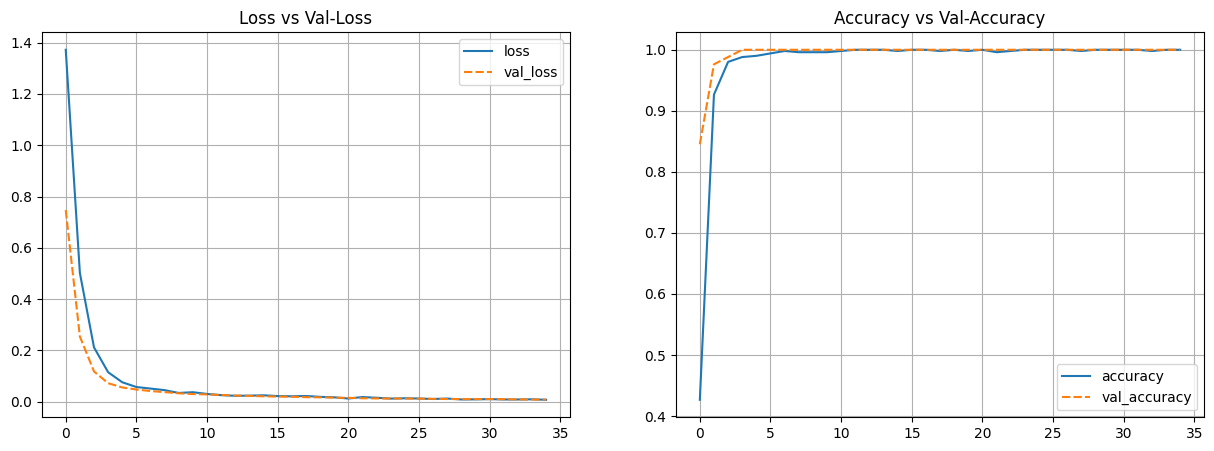

In [22]:
# Convert training history of the improved model to a DataFrame
history_improve_model_df = pd.DataFrame(history_improve_model.history)

plt.figure(figsize=(15, 5))

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
sns.lineplot(data=history_improve_model_df[['loss', 'val_loss']])  # Training and validation loss
plt.grid()
plt.title('Loss vs Val-Loss')

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(data=history_improve_model_df[['accuracy', 'val_accuracy']])  # Training and validation accuracy
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

# Display the plots
plt.show()

From the `Loss vs Val-Loss` and `Accuracy vs Val-Accuracy` graphs of the improved model, the following insights can be derived:
1. `Loss vs Val-Loss`
    - Training loss decreases consistently during the initial epochs, reaching a very small value close to 0. This indicates that the model learns well from the training data.
    - Validation loss also decreases steadily and stabilizes at a very low value, reflecting the model's ability to generalize to the validation data.
    - Both curves are very close, with no significant gap, demonstrating that the model does not experience overfitting. This shows the model performs well on both training and validation data.

2. `Accuracy vs Val-Accuracy`
    - Training accuracy rises sharply, reaching nearly **1.0 (100%)** within the first few epochs, indicating that the model quickly learns patterns from the training data.
    - Validation accuracy also increases rapidly, approaching **1.0** and remaining stable throughout the training process.
    - The validation accuracy curve closely follows the training accuracy curve, indicating no performance degradation on unseen data.
    - Both training and validation accuracy curves are almost identical, with no significant fluctuations, demonstrating that the model generalizes extremely well and does not suffer from underfitting or overfitting.

3. **General Performance**
    - The model exhibits excellent performance, with near-perfect accuracy on both training and validation data.
    - The stability of the loss values indicates that callbacks such as `ReduceLROnPlateau` and `EarlyStopping` effectively maintained training efficiency.

Next, evaluate the performance of the improved model on the test set by:
- Predicting the probabilities for each class.
- Determining the predicted class by selecting the class with the highest probability.

In [23]:
# Predict class probabilities for the test set using the improved model
y_pred_prob = improve_model.predict_generator(test_gen)

# Extract the class with the highest probability for each prediction
y_pred_class = np.argmax(y_pred_prob, axis=-1)

Next, create a confusion matrix to evaluate the performance of the improved model on the test set by computing the confusion matrix using the predicted values and the true values from the test set.

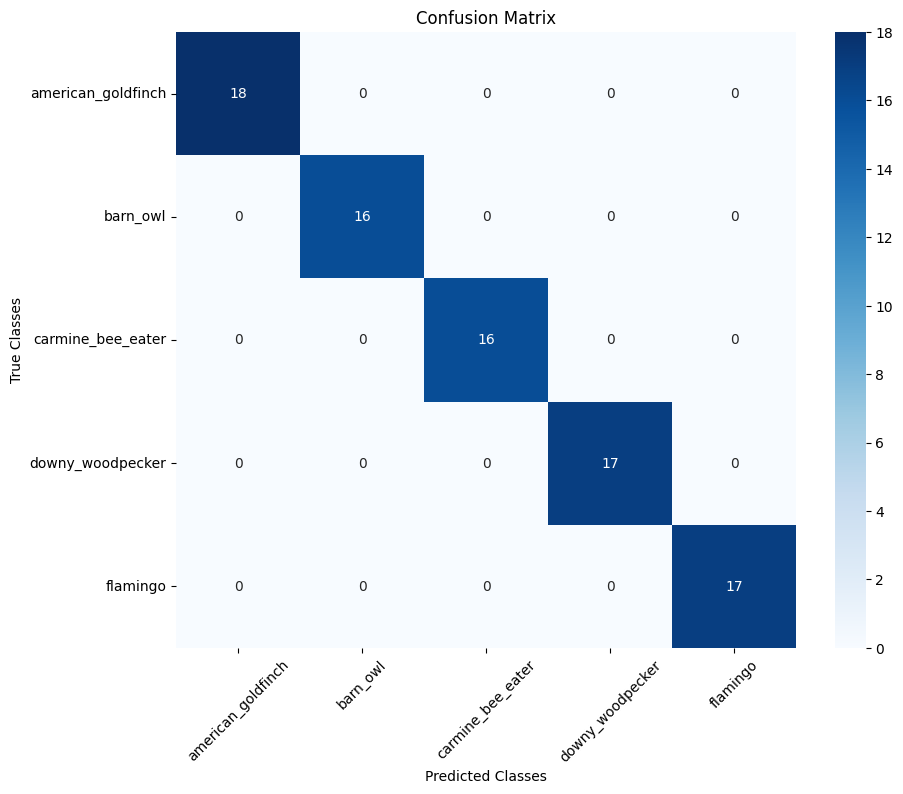

In [24]:
# Generate the confusion matrix from true and predicted classes
cm = confusion_matrix(test_gen.classes, y_pred_class)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=list(test_gen.class_indices.keys()),
            yticklabels=list(test_gen.class_indices.keys()))

# Add title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')

# Adjust label rotation
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the heatmap
plt.show()

From the heatmap of the Confusion Matrix, it is evident that all elements lie on the main diagonal (predictions match the actual classes). There are no non-diagonal values, indicating that no images were misclassified into the wrong classes. This means the model successfully classified all samples in the test set correctly, achieving a **100% test set accuracy**, which reflects optimal performance.

The final verification step is to check the model's accuracy score based on predictions on the test set, to evaluate its performance on unseen data.

In [25]:
# Display the accuracy score of the improved model on the test set
print('Improvement Model Test - Accuracy Score: ', classification_report(test_gen.classes, y_pred_class, output_dict=True)['accuracy'])

Improvement Model Test - Accuracy Score:  1.0


The model achieved **100% accuracy** on the test set, meaning all model predictions matched the true labels with no misclassifications in the test data. Consistent performance across the training, validation, and test sets indicates that the model successfully learned patterns from the training data without overfitting. Additionally, the model demonstrated excellent generalization on both the validation and test sets, confirming that this improved model is good fit.

## Model Saving

In [26]:
# Save the improved model in HDF5 format
improve_model.save('improved_model.h5')

## Conclusion

**Model Performance**
- `MobileNetV2` as the base model demonstrates high efficiency, leveraging pre-trained weights to boost accuracy even with a relatively small dataset.
- The improved model built on `MobileNetV2` shows excellent performance across training, validation, and test sets, achieving **100% accuracy** on the test set.
- Visualization of predictions during model inference highlights the model’s ability to recognize bird images with high probability, even for images with varied poses and backgrounds.
- The model can be considered **good fit**, with no indications of overfitting or underfitting.


**Prediction Analysis**

All bird species were correctly identified during model inference. However, images of Flamingos with artificial backgrounds showed slightly lower probabilities (0.80), indicating that the model may need additional training on non-natural or synthetic data.

**Overall**
- The model is highly effective and holds great potential for real-world implementation. With the addition of more diverse data and evaluation on external datasets, it can become a reliable tool for supporting business, education, and environmental conservation.
- Further optimization, such as fine-tuning and data augmentation, will enhance its performance for practical applications

## Recommendation

**Recommendations for the Model**
1. Expand Training Data: Add more diverse bird images with varying backgrounds and poses, including artificial conditions (e.g., transparent or illustrated images) to improve the model's ability to recognize non-natural images. If feasible, incorporate external datasets to retrain the model, ensuring better generalization for images from different sources.
2. Fine-Tune `MobileNetV2`: With a larger dataset, unlock some of the final layers of `MobileNetV2` to allow retraining, enabling the model to better learn specific features of bird species.
3. Evaluate on New Datasets: Test the model on new or real-world datasets to ensure it performs well beyond the current dataset and maintains robust generalization capabilities.

**Recommendations for Business and Environmental Applications**
1. Real-World Implementation
    - Use the model in environmental conservation applications to identify bird species from field photos, monitor bird populations in natural habitats, or assist researchers in automatically recognizing bird distribution patterns.
    - Tourism businesses can leverage this model in applications for identifying bird species for tourists as part of interactive field guides.
2. Education: Incorporate the model into educational applications to help students and the general public recognize various bird species, promoting awareness of conservation and biodiversity.
3. Bird Conservation Support: Deploy the model to identify rare or endangered bird species from camera trap footage, aiding in the development of strategies to protect bird habitats based on automated observation data.